# Part 1.

In [2364]:
import pandas as pd

url = "https://raw.githubusercontent.com/joestubbs/coe379L-fa25/main/datasets/unit01/project1.csv"
df = pd.read_csv(url)


In [2365]:
# Just would like to see what the data contains at first and if it is loaded.
df.head()

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A680855,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
1,A680857,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
2,A680858,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
3,A680859,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
4,A680860,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black


## Identifying the Shape and Size

In [2366]:
df.shape

(131165, 12)

In [2367]:
df.size

1573980

df.info()

There are 131165 Rows and 12 Columns in this dataset. 
This accounts for a total of 1573980 total cells.
From basic exploratory analysis, we can also note some basic info about the structure of the columns of the data.

## Datatypes

In [2368]:
df.dtypes

Animal ID           object
Date of Birth       object
Name                object
DateTime            object
MonthYear           object
Outcome Type        object
Outcome Subtype     object
Animal Type         object
Sex upon Outcome    object
Age upon Outcome    object
Breed               object
Color               object
dtype: object

Right now the data is all object types. There absolutely must be some datatype conversions, as object is only for string types. We should convert Date of Birth, DateTime to a datetime64 types. Additionally, Sex, Outcome Type, Outcome Subtype, Animal Type should be categorical. Age can be parsed as a numeric type, and we can define age in terms of days for more a standardized approach. 

In [2369]:
df.duplicated().sum()

17

In [2370]:
# Let's drop the 17 duplicated rows. We'll use inplace to change df, and ignore_index to reindex the data structure.
df.drop_duplicates(inplace=True, ignore_index=True)

In [2371]:
df.shape

(131148, 12)

We can confirm the rows were properly deleted! 

## Missing Values/NaNs

In [2372]:
df.isna().sum()

Animal ID               0
Date of Birth           0
Name                37503
DateTime                0
MonthYear               0
Outcome Type           40
Outcome Subtype     65346
Animal Type             0
Sex upon Outcome        0
Age upon Outcome        0
Breed                   0
Color                   0
dtype: int64

In [2373]:
# Let's start by replacing missing values for Name. We can impute with a constant value, because Name has no category.
df['Name'] = df['Name'].fillna('Unknown')

# We will impute the subtype column by the group mode of the Outcome Type.
# Outcome Type is the perfect predictor for imputing the missing values.
df['Outcome Subtype'] = df['Outcome Subtype'].fillna(
    df.groupby('Outcome Type')['Outcome Subtype'].transform(lambda x: x.mode()[0])
)

In [2374]:
df.isna().sum()

Animal ID            0
Date of Birth        0
Name                 0
DateTime             0
MonthYear            0
Outcome Type        40
Outcome Subtype     38
Animal Type          0
Sex upon Outcome     0
Age upon Outcome     0
Breed                0
Color                0
dtype: int64

At this point, the only Rows left are the ones without a type of a subtype. We can delete these. 
Observe that this is only 40/131165 of the rows, or 0.03% of the entire dataset.
It would be wise to clean these rows.

In [2375]:
df.dropna(inplace=True, subset=['Outcome Type'])

In [2376]:
df.isna().sum()

Animal ID           0
Date of Birth       0
Name                0
DateTime            0
MonthYear           0
Outcome Type        0
Outcome Subtype     0
Animal Type         0
Sex upon Outcome    0
Age upon Outcome    0
Breed               0
Color               0
dtype: int64

No null values remain!!

## Completing the Preprocessing 

Now that there are no NaN values, we should convert each of the data types as well as drop columns which are no longer necessary.
Of the columns, Animal ID and Name do not provide any relevant information. Animal ID is a unique identifier and Names are not useful in statistics. Neither have any true use.

In [2377]:
df.drop(['Name'], axis=1, inplace=True)
df.drop(['Animal ID'], axis=1, inplace=True)
df.shape

(131108, 10)

Let us first begin by converting from object --> categorical on the columns previously discussed.

In [2378]:
df['Outcome Type'] = df['Outcome Type'].astype('category')
df['Outcome Subtype'] = df['Outcome Subtype'].astype('category')
df['Animal Type'] = df['Animal Type'].astype('category')
df['Sex upon Outcome'] = df['Sex upon Outcome'].astype('category')
df['Breed'] = df['Breed'].astype('category')
df['Color'] = df['Color'].astype('category')

Observe that Date of Birth can be directly derived from Age upon Outcome. There is not much use for this column.

In [2379]:
df.drop(['Date of Birth'], axis=1, inplace=True)

We can also extract the Year and Month to be used for analysis. This is the year and month of outcome. 

In [2380]:
df['MonthYear'] = pd.to_datetime(df['MonthYear'], format='%b-%y')
df['Year'] = df['MonthYear'].dt.year
df['Month'] = df['MonthYear'].dt.month

When done, we can remove the MonthYear and DateTime. For outcome prediction, time would not make sense to use here.

In [2381]:
df.drop(['MonthYear'], axis=1, inplace=True)
df.drop(['DateTime'], axis=1, inplace=True)

Let's make Age upon Outcome store the animal's age in Days! 

In [2382]:
def apply_conversion(age):
    split = age.split()
    num, type = split[0], split[1]
    num = float(num)
    if 'day' in type:
        return num
    elif 'week' in type:
        return num * 7
    elif 'month' in type:
        return num * 30
    elif 'year' in type:
        return num * 365
    else:
        raise TypeError

df['Age upon Outcome'] = df['Age upon Outcome'].apply(apply_conversion)

In [2383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131108 entries, 0 to 131147
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Outcome Type      131108 non-null  category
 1   Outcome Subtype   131108 non-null  category
 2   Animal Type       131108 non-null  category
 3   Sex upon Outcome  131108 non-null  category
 4   Age upon Outcome  131108 non-null  float64 
 5   Breed             131108 non-null  category
 6   Color             131108 non-null  category
 7   Year              131108 non-null  int32   
 8   Month             131108 non-null  int32   
dtypes: category(6), float64(1), int32(2)
memory usage: 4.1 MB


We will also need to remove the Outcome Subtype column. More on this in the report.

In [2384]:
df.drop(['Outcome Subtype'], axis=1, inplace=True)

## Univariate Analysis

In [2385]:
# Get some basic statistics of each of the variables
df.describe()

,Age upon Outcome,Year,Month
count,131108.000000,131108.000000,131108.000000
mean,574.969163,2018.586112,6.756460
std,876.400139,3.317949,3.332406
min,1.000000,2013.000000,1.000000
25%,60.000000,2016.000000,4.000000
50%,240.000000,2018.000000,7.000000
75%,730.000000,2021.000000,10.000000
max,10950.000000,2025.000000,12.000000


In [2386]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Age upon Outcome', ylabel='Count'>

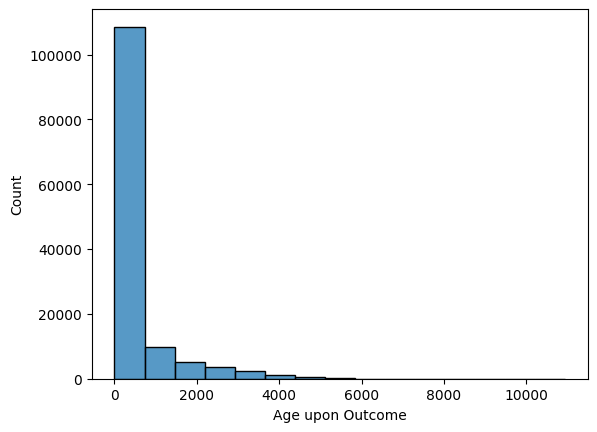

In [2387]:
# Analyzing numeric data --> Age of Outcome
sns.histplot(data=df['Age upon Outcome'], bins=15)

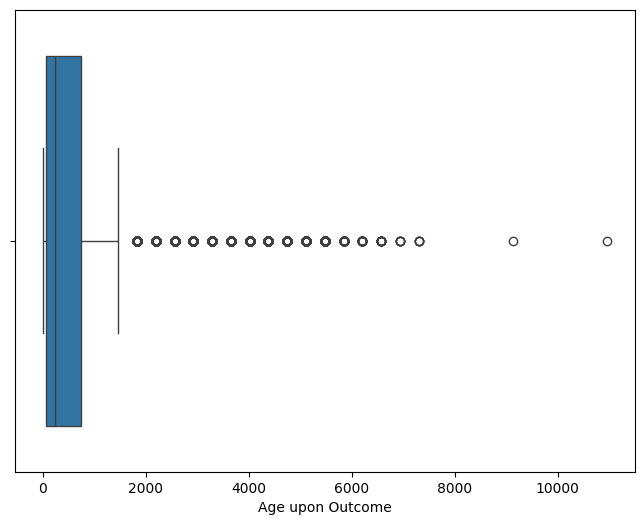

In [2388]:
# Analyzing numeric data --> box plot of age.
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age upon Outcome'])
plt.xlabel("Age upon Outcome")
plt.show()

<Axes: xlabel='Year', ylabel='Count'>

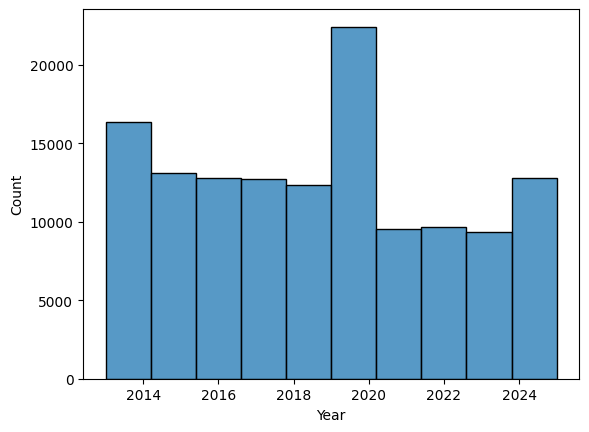

In [2389]:
# Analyzing numeric data --> Year
sns.histplot(data=df['Year'], bins=10)

<Axes: xlabel='Month', ylabel='Count'>

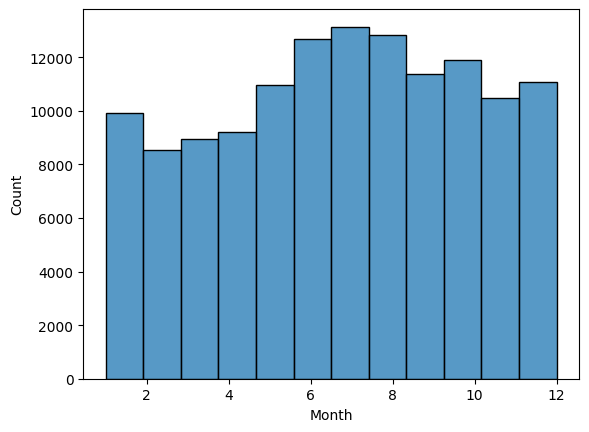

In [2390]:
# Analyzing numeric data --> Month
sns.histplot(data=df['Month'], bins=12)

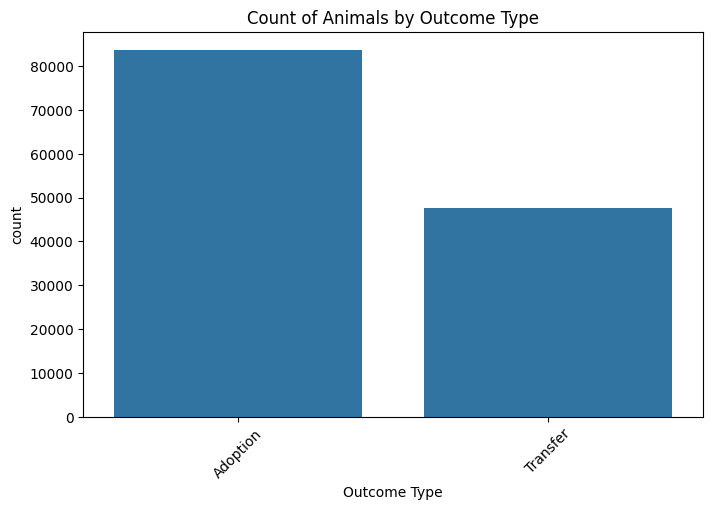

In [2391]:
# Analyzing Categorial Data --> Outcome Type
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Outcome Type', order=df['Outcome Type'].value_counts().index)
plt.title('Count of Animals by Outcome Type')
plt.xticks(rotation=45)
plt.show()

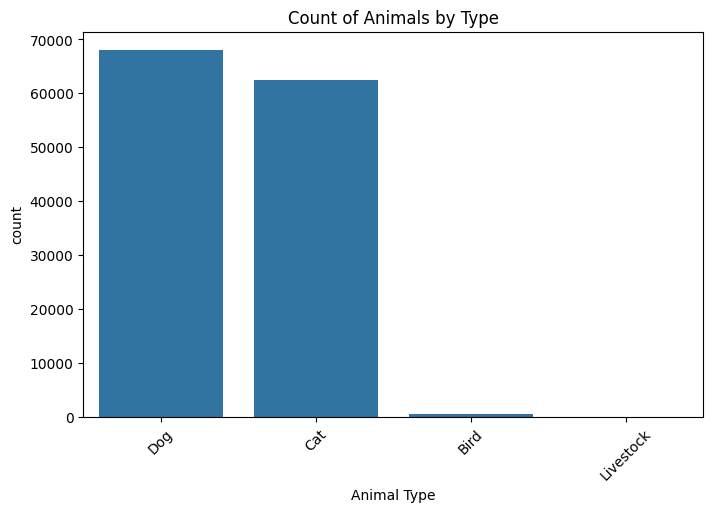

In [2392]:
# Visualizing the Top Animals by Type
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Animal Type', order=df['Animal Type'].value_counts().index)
plt.title('Count of Animals by Type')
plt.xticks(rotation=45)
plt.show()

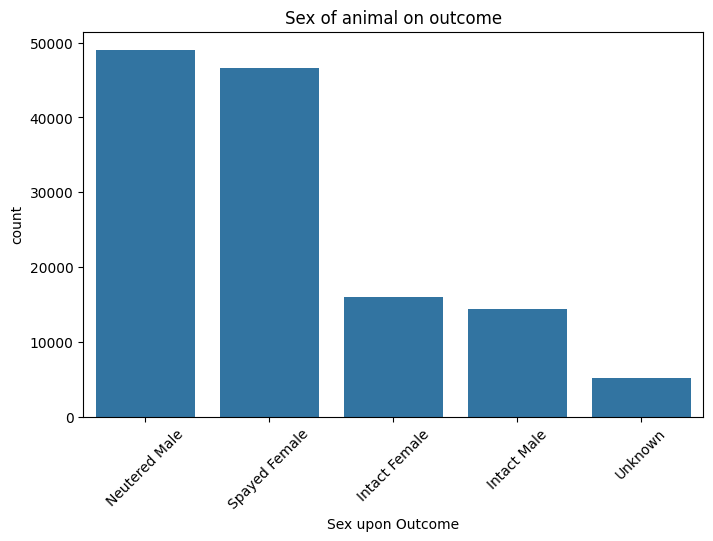

In [2393]:
# Visualizing the Top 10 Sex
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Sex upon Outcome', order=df['Sex upon Outcome'].value_counts().index)
plt.title('Sex of animal on outcome')
plt.xticks(rotation=45)
plt.show()

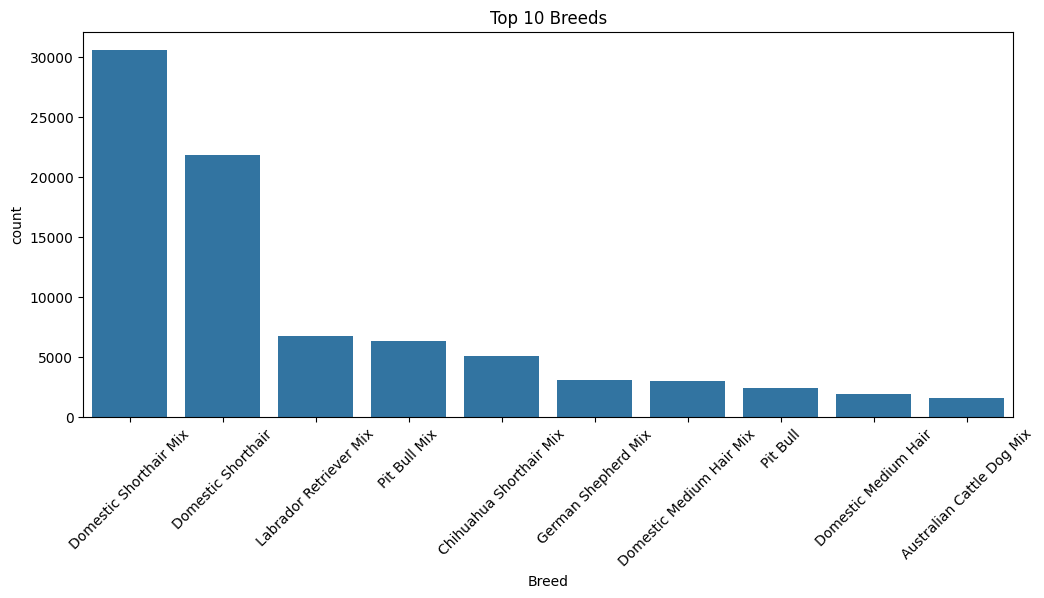

In [2394]:
# Visualizing the Top 10 Breeds
top_breeds = df['Breed'].value_counts().nlargest(10).index
plt.figure(figsize=(12,5))
sns.countplot(data=df[df['Breed'].isin(top_breeds)], x='Breed', order=top_breeds)
plt.title('Top 10 Breeds')
plt.xticks(rotation=45)
plt.show()


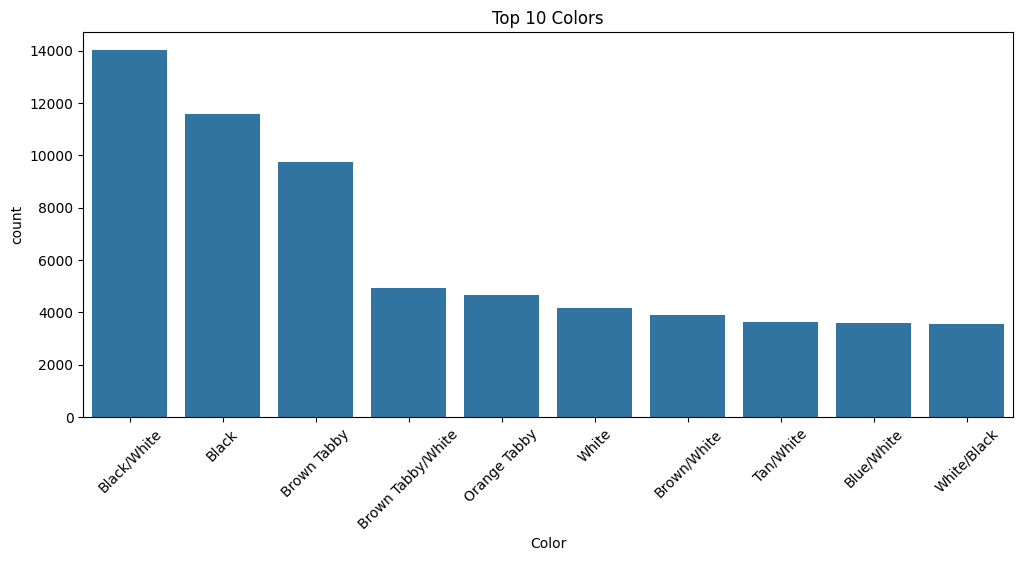

In [2395]:
# Visualizing the Top 10 Colors of animal.
top_colors = df['Color'].value_counts().nlargest(10).index
plt.figure(figsize=(12,5))
sns.countplot(data=df[df['Color'].isin(top_colors)], x='Color', order=top_colors)
plt.title('Top 10 Colors')
plt.xticks(rotation=45)
plt.show()

## Univariate Analysis

There some interesting trends in both the numerical and categorical data.
In the numerical data, the most important distinction is how skewed the ages of the animals.
- The bar graph shows that nearly all of the observations occur before the animal is 2000 days, or about 5 years old.
- The box plot confirms this. The 75th Quartile is centered around 1700 days, while the mean is much closer to 0-300 days.

- The year and month reveal some additional information. Most years saw the same amount of animal outcomes, with the exception of 2019-2020. This would imply that the dataset is slightly skewed in favor of those 2 years.
- Interestingly, a majority observations occurred in the Summer and Winter months (6-12).

For the categorial data, a lot of the trends revolved around the characteristics of the animals.
Some basic notes include a strong bias for cats and dogs, strong bias for neuteured male and spayed female, and a 2:1 ratio of adoption to transfers. Top 10 breeds and colors yielded some interesting results, though these categories are likely not relevant to the model itself. 

One Hot Encoding.

In [2396]:
# One-hot encode
df_encoded = pd.get_dummies(df, columns=['Animal Type', 'Sex upon Outcome'], drop_first=False)

In [2397]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131108 entries, 0 to 131147
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   Outcome Type                    131108 non-null  category
 1   Age upon Outcome                131108 non-null  float64 
 2   Breed                           131108 non-null  category
 3   Color                           131108 non-null  category
 4   Year                            131108 non-null  int32   
 5   Month                           131108 non-null  int32   
 6   Animal Type_Bird                131108 non-null  bool    
 7   Animal Type_Cat                 131108 non-null  bool    
 8   Animal Type_Dog                 131108 non-null  bool    
 9   Animal Type_Livestock           131108 non-null  bool    
 10  Sex upon Outcome_Intact Female  131108 non-null  bool    
 11  Sex upon Outcome_Intact Male    131108 non-null  bool    
 12  Sex upo

In [2398]:
df_encoded.head()

,Outcome Type,Age upon Outcome,Breed,Color,Year,Month,Animal Type_Bird,Animal Type_Cat,Animal Type_Dog,Animal Type_Livestock,Sex upon Outcome_Intact Female,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown
0,Transfer,14.0,Duck,Yellow/Black,2014,6,True,False,False,False,False,False,False,False,True
1,Transfer,14.0,Duck,Yellow/Black,2014,6,True,False,False,False,False,False,False,False,True
2,Transfer,14.0,Duck,Yellow/Black,2014,6,True,False,False,False,False,False,False,False,True
3,Transfer,14.0,Duck,Yellow/Black,2014,6,True,False,False,False,False,False,False,False,True
4,Transfer,14.0,Duck,Yellow/Black,2014,6,True,False,False,False,False,False,False,False,True


## Part 2.

In [2399]:
df_encoded.drop(['Color'], axis=1, inplace=True)
df_encoded.drop(['Breed'], axis=1, inplace=True)
df_encoded.isna().sum()

Outcome Type                      0
Age upon Outcome                  0
Year                              0
Month                             0
Animal Type_Bird                  0
Animal Type_Cat                   0
Animal Type_Dog                   0
Animal Type_Livestock             0
Sex upon Outcome_Intact Female    0
Sex upon Outcome_Intact Male      0
Sex upon Outcome_Neutered Male    0
Sex upon Outcome_Spayed Female    0
Sex upon Outcome_Unknown          0
dtype: int64

Defining the amount of training and testing data. 
A 20% Training/80% Testing is our chosen method. 

In [2400]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop(columns=['Outcome Type'])  
y = df_encoded['Outcome Type']               

# Stratify to ensure proportionality. Include random state as well.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=10,stratify=y)

The next step is pursuing a KNN. We will do this without optimizations. 

In [2401]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from sklearn.model_selection import GridSearchCV

# n-neighbors will initially be set to 3. 
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

pred_y = model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, pred_y))
print("\nClassification Report:\n", classification_report(y_test, pred_y))

KNN Accuracy: 0.829265502250019

Classification Report:
               precision    recall  f1-score   support

    Adoption       0.84      0.90      0.87     16716
    Transfer       0.80      0.71      0.75      9506

    accuracy                           0.83     26222
   macro avg       0.82      0.80      0.81     26222
weighted avg       0.83      0.83      0.83     26222



We'll now enhance the KNN to search for the optimal amount of neighbors. We will search the parameter range 3-13.

In [ ]:
knn_enhanced = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(3, 13)}
knn_gscv = GridSearchCV(knn_enhanced, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)
print(knn_gscv.best_params_)

The optimal model is a KNN with 11 Nearest Neighbors. 

In [ ]:
best_knn = knn_gscv.best_estimator_
pred_y = best_knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, pred_y))
print("\nClassification Report:\n", classification_report(y_test, pred_y))

Lastly, we will define a linear classifier. We will use an SGD with a log_loss. 

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log_loss', alpha=0.05, random_state=1)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

In [ ]:
print("SGD Classifier Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))